# CHAPTER 2 - The Tools of the Trade in Quantum Computing - Qiskit Code

*Note*: You may skip the following two cells if you have alredy installed the right versions of all the libraries mentioned in *Appendix D*. This will likely NOT be the case if you are running this notebook on a cloud service such as Google Colab.

In [ ]:
pip install qiskit==0.39.2

In [ ]:
pip install pylatexenc==2.10

In [ ]:
from qiskit import *

In [2]:
qreg1 = QuantumRegister(size = 2, name = "qrg1")
qreg2 = QuantumRegister(1, "qrg2")
creg = ClassicalRegister(1, "oldschool")

qc = QuantumCircuit(qreg1, creg, qreg2)


In [3]:
qc.draw()

qrg1_0: 
             
     qrg1_1: 
             
       qrg2: 
             
oldschool: 1/

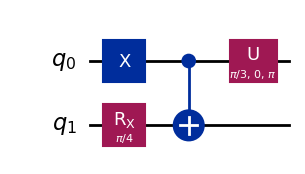

In [4]:
import numpy as np

qc = QuantumCircuit(2) # Initialise the circuit.

# We can now apply the gates sequentially.
qc.x(0)
qc.rx(np.pi/4, 1)
qc.cx(0, 1)
qc.u(np.pi/3, 0, np.pi, 0)

qc.draw("mpl")

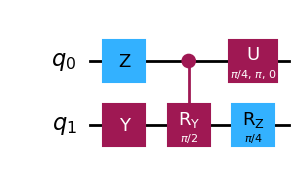

In [5]:
## Exercicios 2.2 pag 75

qc = QuantumCircuit(2) # Initialise the circuit.

# We can now apply the gates sequentially.
qc.z(0)
qc.y(1)
qc.cry(np.pi/2, 0, 1)
qc.u(np.pi/4, np.pi, 0, 0)
qc.rz(np.pi/4, 1)

qc.draw("mpl")

In [6]:
#from qiskit.providers.aer import AerSimulator
from qiskit_aer import AerSimulator

In [7]:
sim = AerSimulator()
sim_GPU = AerSimulator(device = 'GPU')

In [8]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.measure(range(2), range(2))

# A linha abaixo nao funfa com a verao 1.0 do qiskit
# Foi substituida pelas linhas seguintes logo abaixo
#job = execute(qc, sim, shots = 1024)

## Adaptacao abaixo para rodar com a nova versao do qiskit, substituindo as linha anterior.
qc_novo = transpile(qc, sim)
job = sim.run(qc_novo)

result = job.result()
counts = result.get_counts()
print(counts)

{'01': 503, '00': 521}


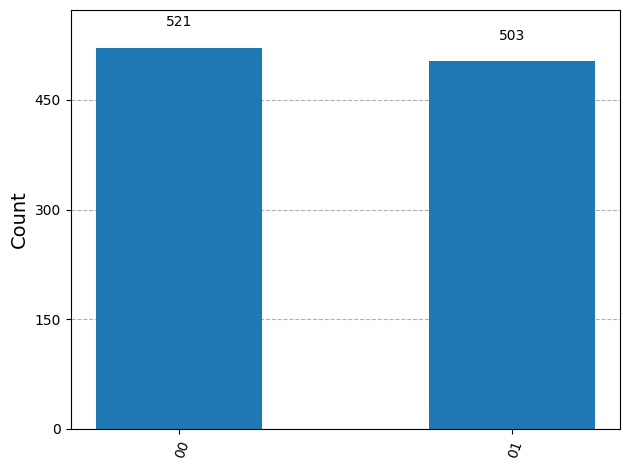

In [9]:
from qiskit.visualization import *
plot_histogram(counts)

In [10]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.save_statevector()
qc.measure(0,0)
qc.measure(1,1)

# A linha abaixo nao funfam com a verao 1.0 do qiskit
# Foi substituida pelas linhas seguintes logo abaixo
#result = execute(qc, sim, shots = 1024).result()

## Adaptacao abaixo para rodar com a nova versao do qiskit, substituindo a linha anterior.
qc_novo = transpile(qc, sim)
result = sim.run(qc_novo).result()

sv = result.get_statevector()
print(sv)
counts = result.get_counts()
print(counts)

Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2))
{'00': 516, '01': 508}


In [11]:
sim_u = AerSimulator(method = 'unitary')

qc = QuantumCircuit(1)
qc.h(0)
qc.save_unitary()

# A linha abaixo nao funfam com a verao 1.0 do qiskit
# Foi substituida pelas linhas seguintes logo abaixo
#result = execute(qc, sim_u).result()

## Adaptacao abaixo para rodar com a nova versao do qiskit, substituindo a linha anterior.
qc_novo = transpile(qc, sim)
result = sim.run(qc_novo).result()
 

U = result.get_unitary(decimals = 4)
print(U)

Operator([[ 0.7071+0.j,  0.7071-0.j],
          [ 0.7071+0.j, -0.7071+0.j]],
         input_dims=(2,), output_dims=(2,))


*Note*: In the following cell, you need to replace "1234" with your actual IBM token. Refer to *Appendix D* in the book for instructions on how to create an account and get your token. Be very careful not to disclose your token to anyone!

In [12]:
from qiskit_ibm_runtime import QiskitRuntimeService
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

ibm_token="1234"

# Save an IBM Quantum account and set it as your default account.
#QiskitRuntimeService.save_account(channel="ibm_quantum_platform", token=ibm_token, set_as_default=True, overwrite=True, verify=False) 
QiskitRuntimeService.save_account(channel="ibm_quantum_platform", token=ibm_token, set_as_default=True, overwrite=True) 
# QiskitRuntimeService.save_account(channel="ibm_quantum", token=ibm_token) 
# Load saved credentials
service = QiskitRuntimeService()
#IBMQ.save_account(ibm_token)

#provider = IBMQ.load_account()
#print(provider.backends(simulator = False))
#print(service.backend())

qiskit_runtime_service.__init__:WARNING:2026-02-02 15:41:57,691: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: Testes. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().


In [13]:
#dev_list = provider.backends(
#    filters = lambda x: x.configuration().n_qubits >= 5,
#    simulator = False)

dev_list = service.backends(
    filters = lambda x: x.configuration().n_qubits >= 5,
    simulator = False)

qiskit_runtime_service.backends:WARNING:2026-02-02 15:42:09,860: Loading instance: Testes, plan: open


In [14]:
#from qiskit.providers.ibmq import *
#dev = least_busy(dev_list)
print(dev_list)

[<IBMBackend('ibm_fez')>, <IBMBackend('ibm_torino')>, <IBMBackend('ibm_marrakesh')>]


In [15]:
#from qiskit.providers.ibmq.job import job_monitor
#from qiskit_ibm_provider.job import job_monitor

# Com simulador Local
# Let us set up a simple circuit.
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()

# First, we run the circuit using the statevector simulator.
sim = AerSimulator()
#backend = service.least_busy(operational=True, simulator=False)
#sim = backend
# A linha abaixo nao funfam com a verao 1.0 do qiskit
# Foi substituida pelas linhas seguintes logo abaixo
#result = execute(qc, sim, shots = 1024).result()

## Adaptacao abaixo para rodar com a nova versao do qiskit, substituindo a linha anterior.
qc_novo = transpile(qc, sim)
result = sim.run(qc_novo).result()
counts_sim = result.get_counts()

# Now we run it on the real device that we selected before.
# A linha abaixo nao funfam com a verao 1.0 do qiskit
# Foi substituida pelas linhas seguintes logo abaixo
#job = execute(qc, dev, shots = 1024)

## Adaptacao abaixo para rodar com a nova versao do qiskit, substituindo a linha anterior.
qc_novo = transpile(qc, sim)
job = sim.run(qc_novo)

#job_monitor(job)
result = job.result()
counts_dev = result.get_counts()

{'00': 528, '11': 496}
{'11': 495, '00': 529}


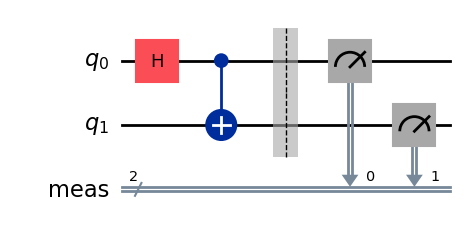

In [16]:
print(counts_sim)
print(counts_dev)
#qc.draw("mpl", idle_wires=False)
qc_novo.draw("mpl", idle_wires=False)

qiskit_runtime_service.backends:WARNING:2026-02-02 15:42:31,049: Loading instance: Testes, plan: open
qiskit_runtime_service.backends:WARNING:2026-02-02 15:42:31,953: Using instance: Testes, plan: open


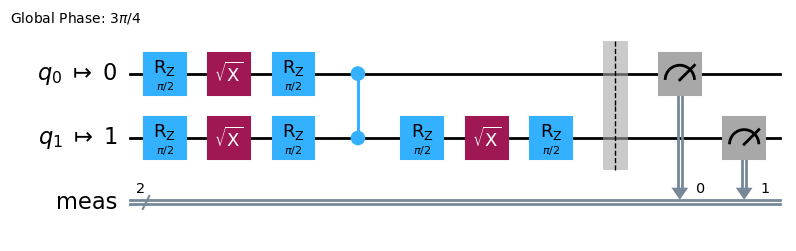

In [17]:
# Executa no hadware quantico da IBM
# Tive que adaptar para a verção nova do qistkit
backend = service.least_busy(simulator=False, operational=True)

# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc_novo)
 
isa_circuit.draw("mpl", idle_wires=False)